In [1]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [2]:
# LOADING GRID FILE AND VARIABLES
!pwd
grid_file = '../DATA/grille.nc' 
print 'file exist:', os.path.isfile(grid_file)

f = Dataset(grid_file) # open netcdf
# extracting variables
lon_t = f.variables['longitude_t'][:] # extracting lon data
lat_t = f.variables['latitude_t'][:] # extracting lat data
depth_t = f.variables['depth_t'][:]
bathy = f.variables['h_w'][:]
print 'Bathy :', np.shape(bathy), 'max :', np.max(bathy), 'min :', np.min(bathy)

f.close()

new_bath = np.ma.masked_where(bathy<200, bathy)

/home/dosa/MON_ENV_PYTHON/IAV
file exist: True
Bathy : (160, 394) max : 5054.49 min : 20.5226


In [3]:
file_path = "./ANNUEL_BIOMETEOPHY/"
list_ann_files = []

for temp_file in os.listdir(file_path):
    if (fnmatch.fnmatch(temp_file, '19*.nc')) | (fnmatch.fnmatch(temp_file, '20*.nc')):
        list_ann_files.append(temp_file)
        
list_ann_files

['2004.nc',
 '2009.nc',
 '2008.nc',
 '1980.nc',
 '1989.nc',
 '2007.nc',
 '2005.nc',
 '1982.nc',
 '1987.nc',
 '2000.nc',
 '2003.nc',
 '1986.nc',
 '1988.nc',
 '1994.nc',
 '1997.nc',
 '1999.nc',
 '1990.nc',
 '1979.nc',
 '1992.nc',
 '2010.nc',
 '1985.nc',
 '2006.nc',
 '1983.nc',
 '1984.nc',
 '1998.nc',
 '1993.nc',
 '2001.nc',
 '1981.nc',
 '1996.nc',
 '2011.nc',
 '1991.nc',
 '2002.nc',
 '1995.nc']

In [5]:
var_list = ['ppb', 'netppb', 'resp', 'ncp', 'export_doc200', 'export_poc200']

for var in var_list:
    print var
    vars()[var+'_arr'] = np.zeros([160,394,33])
    vars()[var+'_arr'][:] = np.nan

z = 0

for curr_file in list_ann_files:
    print 'z =', z
    
    f = Dataset(file_path+curr_file)
    
    for var in var_list:
        temp_var = f.variables[var][0,:,:]

        vars()[var+'_arr'][:,:,z] = temp_var

        temp_var = []
    
    z += 1
    
    f.close()

ppb
netppb
resp
ncp
export_doc200
export_poc200
z = 0
z = 1
z = 2
z = 3
z = 4
z = 5
z = 6
z = 7
z = 8
z = 9
z = 10
z = 11
z = 12
z = 13
z = 14
z = 15
z = 16
z = 17
z = 18
z = 19
z = 20
z = 21
z = 22
z = 23
z = 24
z = 25
z = 26
z = 27
z = 28
z = 29
z = 30
z = 31
z = 32


In [6]:
np.shape(ppb_arr)

(160, 394, 33)

In [9]:
test = np.nanmean(ppb_arr, axis=(2))
np.shape(test)

(160, 394)

END of CELL


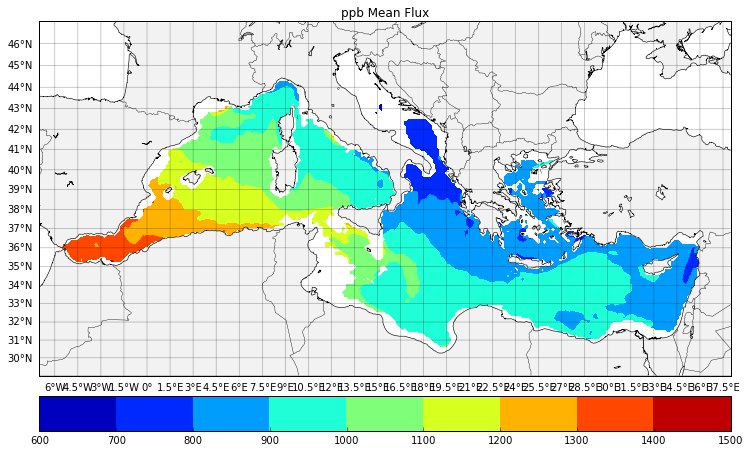

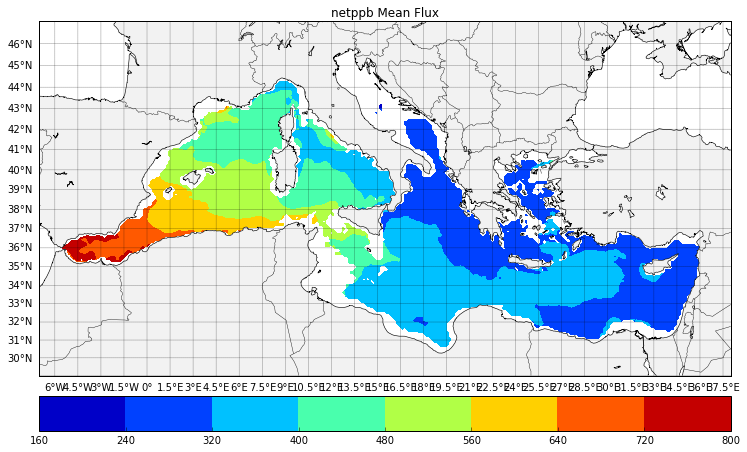

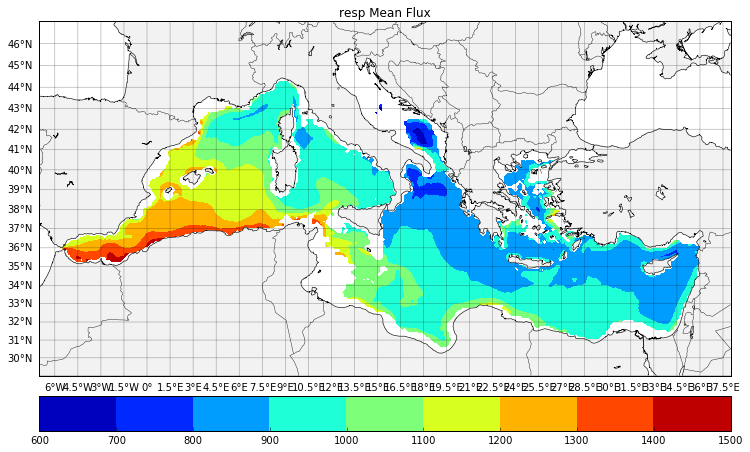

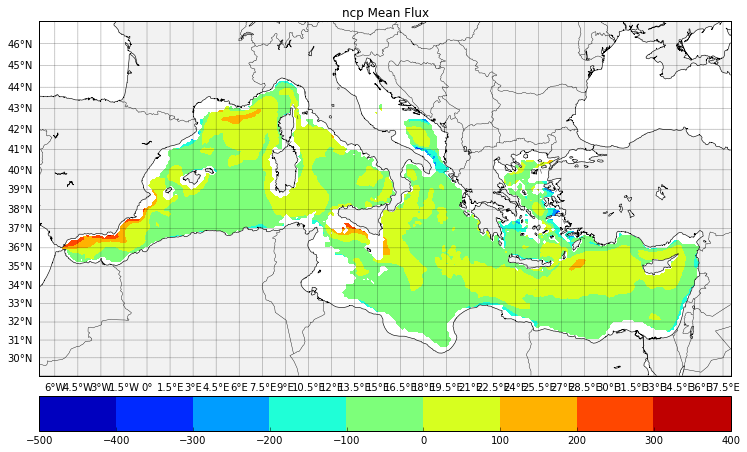

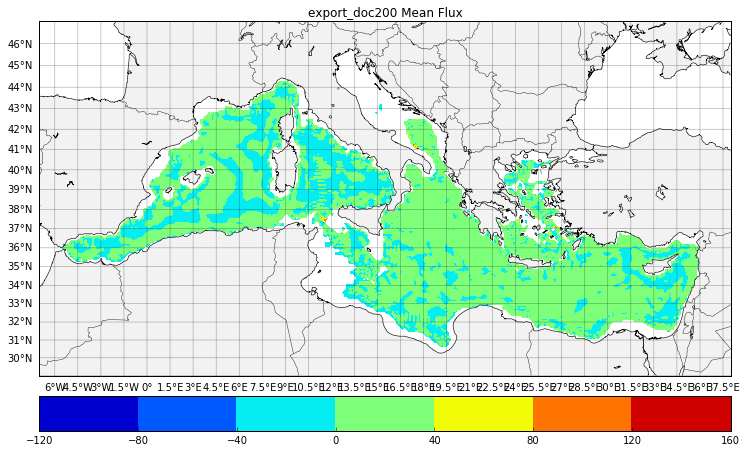

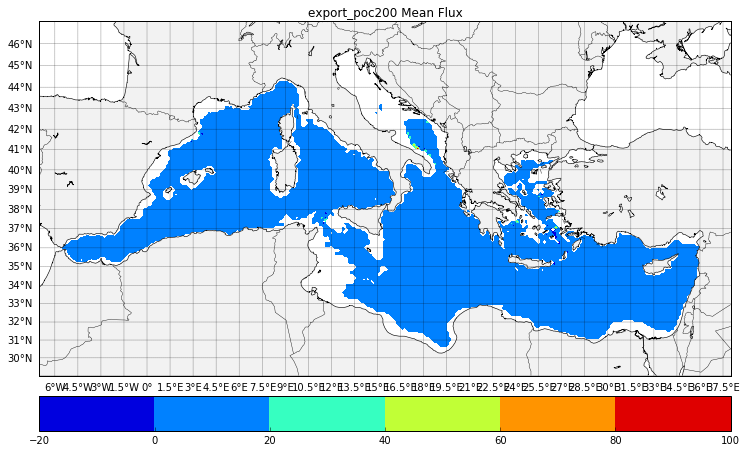

In [15]:
var_list = ['ppb', 'netppb', 'resp', 'ncp', 'export_doc200', 'export_poc200']

for var in var_list:
    vars()[var+'_mean'] = np.nanmean(vars()[var+'_arr'], axis=(2))
    
    # figure
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                    
    fig = plt.figure(figsize=(12,12));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()[var+'_mean'])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    #levels = np.arange(0,500,1);
    #levels2 = [-0.33,0.33];
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,cmap=plt.cm.jet);# binary / jet ,levels=levels , extend='both'
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title(var+' Mean Flux')
    #plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/MEAN_IAV_MAPS/'+var+'_mean_flux.png',bbox_inches='tight',format='png')

print 'END of CELL'

END of CELL


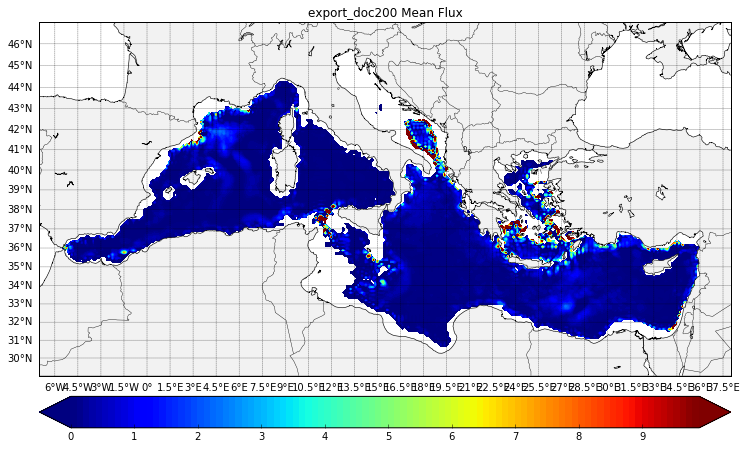

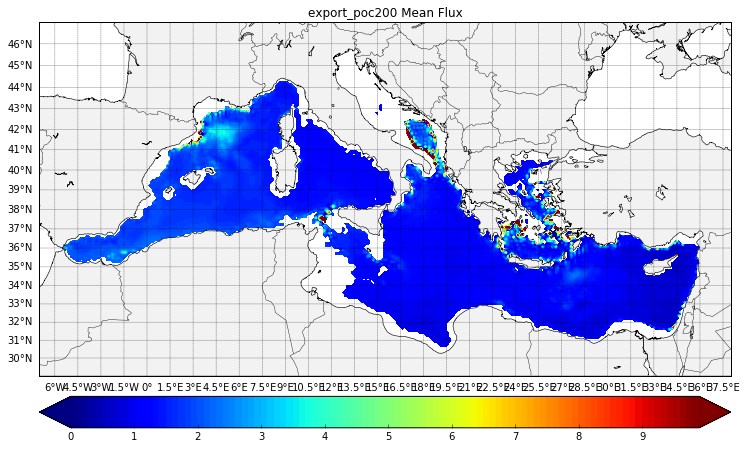

In [19]:
var_list = ['export_doc200', 'export_poc200']

for var in var_list:
    vars()[var+'_mean'] = np.nanmean(vars()[var+'_arr'], axis=(2))
    
    # figure
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                    
    fig = plt.figure(figsize=(12,12));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()[var+'_mean'])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,10,0.1);
    #levels2 = [-0.33,0.33];
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet,extend='both');# binary / jet ,levels=levels , extend='both'
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title(var+' Mean Flux')
    #plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/MEAN_IAV_MAPS/'+var+'_mean_flux.png',bbox_inches='tight',format='png')

print 'END of CELL'

END of CELL


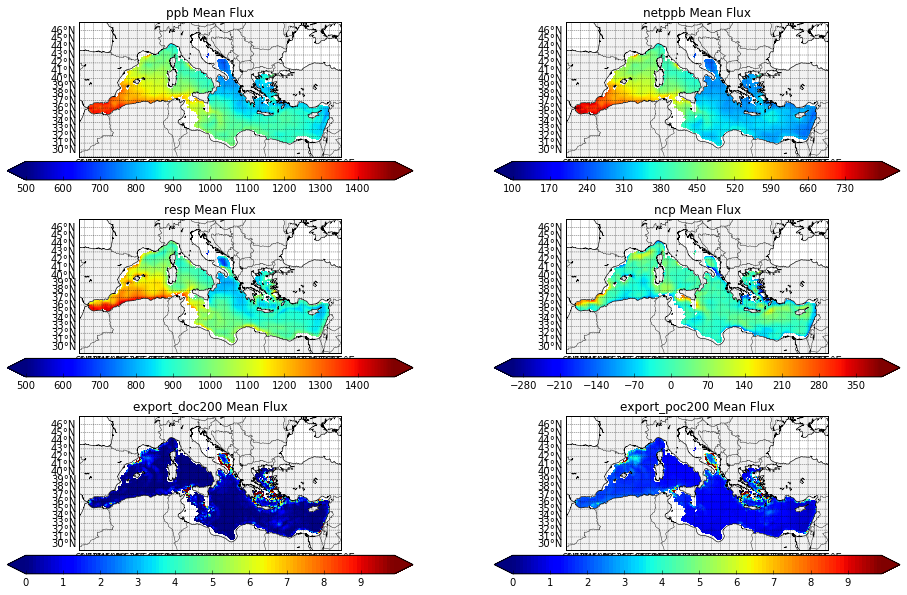

In [22]:
var_list = ['ppb', 'netppb', 'resp', 'ncp', 'export_doc200', 'export_poc200']
plt.figure(figsize=(16,10))
c = 1

for var in var_list:
    vars()[var+'_mean'] = np.nanmean(vars()[var+'_arr'], axis=(2))
    
    # figure
    #if c < 4:
    plt.subplot(3, 2, c)
    #else:
    #    plt.subplot(2, 3, 1)
        
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                    
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()[var+'_mean'])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    if var == 'ppb':
        levels = np.arange(500,1500,1);
    elif var == 'netppb':
        levels = np.arange(100,800,1);
    elif var == 'resp':
        levels = np.arange(500,1500,1);
    elif var == 'ncp':
        levels = np.arange(-300,400,1);
    elif var == 'export_doc200':
        levels = np.arange(0,10,0.1);
    elif var == 'export_poc200':
        levels = np.arange(0,10,0.1);
    #levels2 = [-0.33,0.33];
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet,extend='both');
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title(var+' Mean Flux')
    #plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/MEAN_IAV_MAPS/'+var+'_mean_flux.png',bbox_inches='tight',format='png')
    
    c += 1
    
print 'END of CELL'

END of CELL


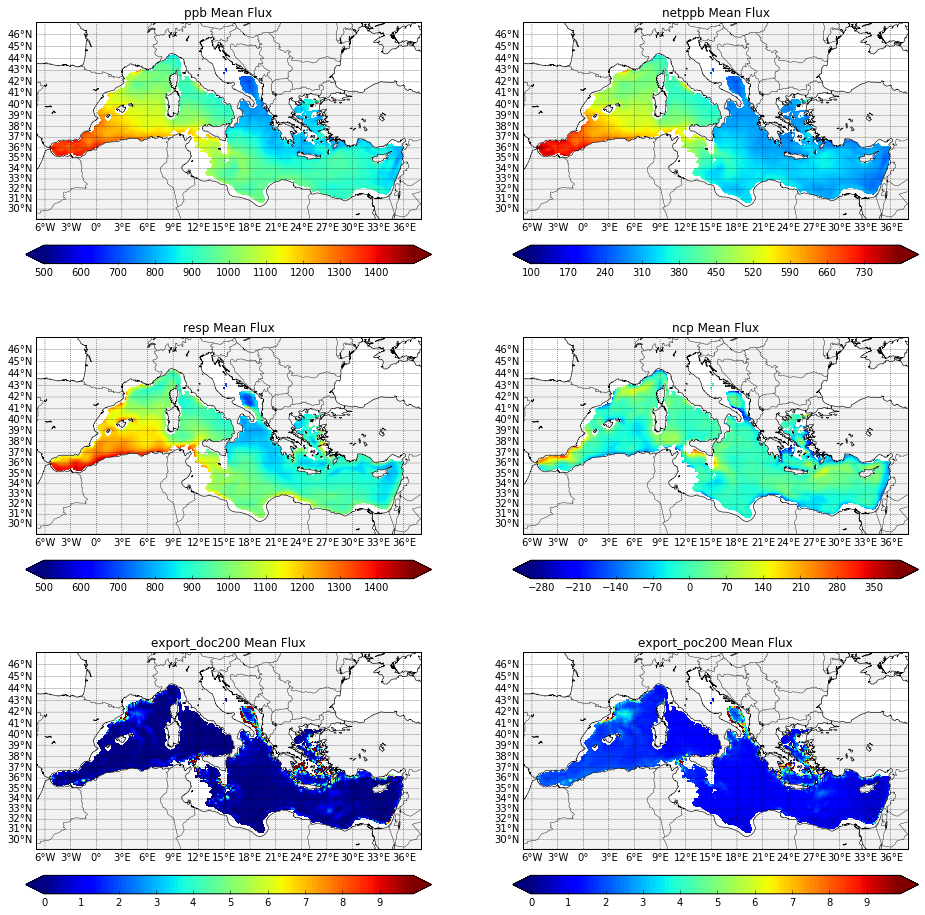

In [28]:
var_list = ['ppb', 'netppb', 'resp', 'ncp', 'export_doc200', 'export_poc200']
plt.figure(figsize=(16,16))
c = 1

for var in var_list:
    vars()[var+'_mean'] = np.nanmean(vars()[var+'_arr'], axis=(2))
    
    # figure
    #if c < 4:
    plt.subplot(3, 2, c)
    #else:
    #    plt.subplot(2, 3, 1)
        
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                    
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    meridians = np.arange(-6.,351.,3);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()[var+'_mean'])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    if var == 'ppb':
        levels = np.arange(500,1500,1);
        txt_lab = 'mgC.m-2.d-1'
    elif var == 'netppb':
        levels = np.arange(100,800,1);
        txt_lab = 'mgC.m-2.d-1'
    elif var == 'resp':
        levels = np.arange(500,1500,1);
        txt_lab = 'mgC.m-2.d-1'
    elif var == 'ncp':
        levels = np.arange(-300,400,1);
        txt_lab = 'mgC.m-2.d-1'
    elif var == 'export_doc200':
        levels = np.arange(0,10,0.1);
        txt_lab = 'mgC.m-2.d-1'
    elif var == 'export_poc200':
        levels = np.arange(0,10,0.1);
        txt_lab = 'mgC.m-2.d-1'
    #levels2 = [-0.33,0.33];
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet,extend='both');
    cb = plt.colorbar(cs, orientation='horizontal', pad = 0.1)
    #cb.set_label(txt_lab, fontsize=14)
    plt.title(var+' Mean Flux')
    #plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/MEAN_IAV_MAPS/'+var+'_mean_flux.png',bbox_inches='tight',format='png')
    
    c += 1

plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/MEAN_IAV_MAPS/6var_mean_flux.png',bbox_inches='tight',format='png') 
print 'END of CELL'